# 東証マザーズ企業データ分析

今回は日経NEEDSのマザーズ上場企業データを使い、
ＦＦＲＩ、アドバンスト・メディア、ラクス、ＰＫＳＨＡ Ｔｅｃｈｎｏｌｏｇy、サインポスト、チームスピリット、イーソル、Ｋｕｄａｎ、ＥｄｕＬａｂ、サーバーワークス
の１０件の企業に着目しました。
またExcelfile（2番目のシート）を以下のようにdataframeとして扱いやすいようにExcel上であらかじめ編集しました。

なお、企業の選定基準はNISTEP企業名辞書（ver.2019_1）の日本標準産業分類に「ソフトウェア業」が含まれるもの、
あるいは日本経済新聞のwebページhttps://www.nikkei.com/nkd/industry/stocklist/?n_m_code=146&hm=2
の銘柄一覧の中で「システム・ソフトウエア」に分類されているものの中から選定しました。

In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

input_book = pd.ExcelFile('FqReport_mothers_20190510.xlsx')
input_sheet_name = input_book.sheet_names

df = input_book.parse(input_sheet_name[1])
df

,企業利潤率,日経会社コード,固定資産回転率,自己資本経常利益率,自己資本営業利益率,売上高研究開発費比率,ＲＯＥ（自己資本利益率）（Ａ）,ＲＯＥ（自己資本利益率）（Ｂ）,売上高・営業収益,１株当たり利益［累計］,...,ソフトウェア,意匠権,商標権,のれん,【ＱＴＲ】有形固定資産,【ＱＴＲ】無形固定資産,期末従業員数,期末女子従業員数,期末男子従業員数,特許権・実用新案権
ＦＦＲＩ,-,31920,-,-,-,5.38,-,-,-,NaN,...,67,-,-,-,23,68,89,NaN,NaN,-
アドバンスト・メディア,8.79,24144,2.44,12.22,12.96,10.7,10.46,9.42,-,NaN,...,310,-,-,5,53,316,181,NaN,NaN,-
ラクス,27.39,36283,4.34,37.62,37.44,-,26.37,25.89,-,NaN,...,21,-,-,1283,201,1659,561,NaN,NaN,-
ＰＫＳＨＡ Ｔｅｃｈｎｏｌｏｇy,13.97,32265,2.51,10.02,10.16,0.67,10.41,10.41,-,NaN,...,-,-,-,91,69,273,73,NaN,NaN,-
サインポスト,13.12,32294,16.93,22.31,22.56,-,16.84,16.84,-,NaN,...,95,-,-,-,45,95,-,NaN,NaN,-
チームスピリット,4.08,32383,14.41,10.39,13.28,-,17.52,17.52,-,NaN,...,-,-,-,-,17,-,64,NaN,NaN,-
イーソル,13.44,19498,14.64,20.3,20.62,4.38,15.48,15.43,-,NaN,...,47,-,-,6,118,56,419,NaN,NaN,-
Ｋｕｄａｎ,1.45,32437,45.33,2.09,-1.57,25.49,1.57,1.57,-,NaN,...,-,-,-,-,-,-,14,NaN,NaN,-
ＥｄｕＬａｂ,13.12,32440,1.73,44.99,47.97,-,27.32,27.32,-,NaN,...,1792,-,-,-,53,1792,115,NaN,NaN,-
サーバーワークス,18.98,32462,3.32,21.94,21.94,-,23.31,19.09,-,NaN,...,109,-,4,-,31,114,-,NaN,NaN,-


まず企業利潤率に着目すると、- となっているＦＦＲＩを除き全て正の値であることがわかります。<br>
分析の為に - を０に変えます。

In [2]:
df２=df.replace('-',0)

主な財務パフォーマンスのデータや従業員数を取り込みます。

In [3]:
profit_rate = df2.loc[:,'企業利潤率']
turnover=df2.loc[:,'固定資産回転率']
staff=df2.loc[:,'期末従業員数']
ROE=df2.loc[:,'ＲＯＥ（自己資本利益率）（Ａ）']
operatingreturn=df2.loc[:,'自己資本営業利益率']

企業利潤率の統計量を見てみます。

In [4]:
profit_rate.describe()

count    10.000000
mean     11.434000
std       8.294344
min       0.000000
25%       5.257500
50%      13.120000
75%      13.837500
max      27.390000
Name: 企業利潤率, dtype: float64

半数以上の企業で、企業利潤率が１３％を超えています。
ソフトウェア産業の未来は明るいかもしれません。

/Users/yutopia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/yutopia/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


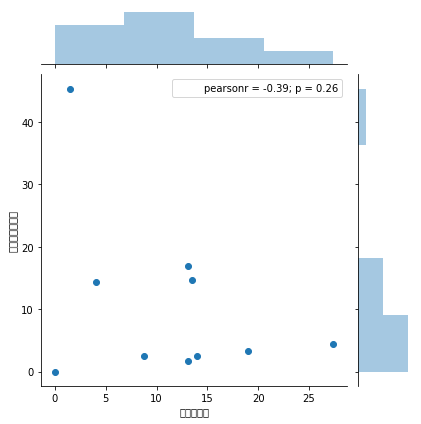

In [5]:
sns.jointplot(data=df２, x="企業利潤率", y="固定資産回転率").annotate(stats.pearsonr)

企業利潤率と固定資産回転率は少し負の相関がみられます。

/Users/yutopia/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


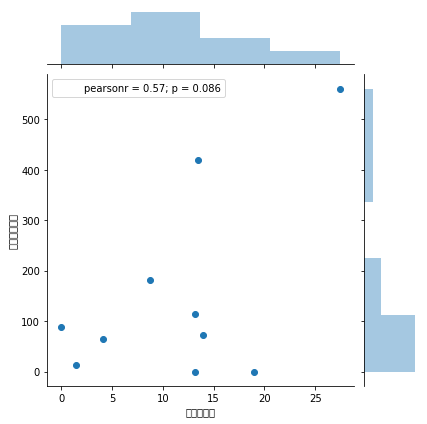

In [6]:
sns.jointplot(data=df２, x="企業利潤率", y="期末従業員数").annotate(stats.pearsonr)

個人的にはあまり相関が企業利潤率と期末従業員数はあまり関係がないと思っていましたが、やや正の相関がみられました。<br>
従業員が多ければ企業利潤率が高まりやすいというよりは、企業利潤率が高いから従業員が多い（増やした）と考えるのが妥当と思われます。<br>
次に、固定資産回転率、自己資本利益率、ROEのヒストグラムをみてみます。

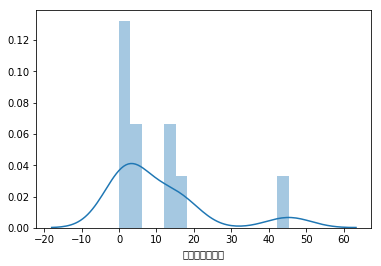

In [7]:
sns.distplot(turnover,bins=15) #固定資産回転率

多くの企業が固定資産を売り上げに繋げられていると言えそうです。

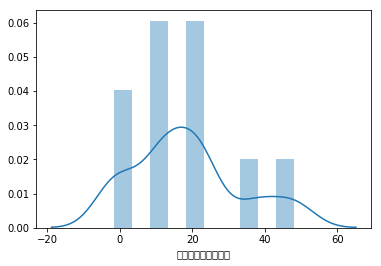

In [8]:
sns.distplot(operatingreturn,bins=10) #自己資本利益率

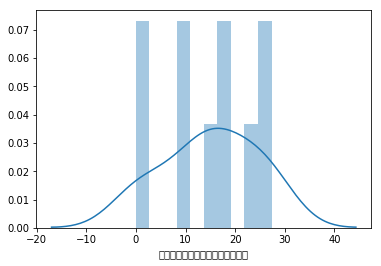

In [9]:
sns.distplot(ROE,bins=10) #ROE

どのパラメータも全ての企業で正なので条件を厳しくしてより良い財務パフォーマンスの企業だけを絞ります。<br>
まず企業利潤率が１０％以上の企業に絞り込みます。

In [10]:
df_profitable=df[profit_rate>=10]

In [11]:
df_profitable

,企業利潤率,日経会社コード,固定資産回転率,自己資本経常利益率,自己資本営業利益率,売上高研究開発費比率,ＲＯＥ（自己資本利益率）（Ａ）,ＲＯＥ（自己資本利益率）（Ｂ）,売上高・営業収益,１株当たり利益［累計］,...,ソフトウェア,意匠権,商標権,のれん,【ＱＴＲ】有形固定資産,【ＱＴＲ】無形固定資産,期末従業員数,期末女子従業員数,期末男子従業員数,特許権・実用新案権
ラクス,27.39,36283,4.34,37.62,37.44,-,26.37,25.89,-,NaN,...,21,-,-,1283,201,1659,561,NaN,NaN,-
ＰＫＳＨＡ Ｔｅｃｈｎｏｌｏｇy,13.97,32265,2.51,10.02,10.16,0.67,10.41,10.41,-,NaN,...,-,-,-,91,69,273,73,NaN,NaN,-
サインポスト,13.12,32294,16.93,22.31,22.56,-,16.84,16.84,-,NaN,...,95,-,-,-,45,95,-,NaN,NaN,-
イーソル,13.44,19498,14.64,20.3,20.62,4.38,15.48,15.43,-,NaN,...,47,-,-,6,118,56,419,NaN,NaN,-
ＥｄｕＬａｂ,13.12,32440,1.73,44.99,47.97,-,27.32,27.32,-,NaN,...,1792,-,-,-,53,1792,115,NaN,NaN,-
サーバーワークス,18.98,32462,3.32,21.94,21.94,-,23.31,19.09,-,NaN,...,109,-,4,-,31,114,-,NaN,NaN,-


固定資産回転率が４０％を超えていたKudanも気になりますが、今回は選考から外します。<br>
さらに、固定資産回転率が１０％以上の会社を絞り込みます。

In [12]:
df_profitable=df_profitable[turnover>=10]

/Users/yutopia/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [13]:
df_profitable

,企業利潤率,日経会社コード,固定資産回転率,自己資本経常利益率,自己資本営業利益率,売上高研究開発費比率,ＲＯＥ（自己資本利益率）（Ａ）,ＲＯＥ（自己資本利益率）（Ｂ）,売上高・営業収益,１株当たり利益［累計］,...,ソフトウェア,意匠権,商標権,のれん,【ＱＴＲ】有形固定資産,【ＱＴＲ】無形固定資産,期末従業員数,期末女子従業員数,期末男子従業員数,特許権・実用新案権
サインポスト,13.12,32294,16.93,22.31,22.56,-,16.84,16.84,-,NaN,...,95,-,-,-,45,95,-,NaN,NaN,-
イーソル,13.44,19498,14.64,20.3,20.62,4.38,15.48,15.43,-,NaN,...,47,-,-,6,118,56,419,NaN,NaN,-


上記二つの会社は財務データが似ています。<br>
有形固定資産と無形固定資産の大小に関しては、2社で逆転していることがわかります。<br>
比較したい他の多くのパラメータがサインポストではnull値あるいは - になっていることが多いので適切な比較はできないですが、就職したい企業として今回は<br>
多くの財務パラメータでイーソルをやや上回り、ソフトウェアが９５００万円と倍近く上回っているサインポストを選びたいと思います。